## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the Bike Sharing Dataset

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [3]:
#Read the data
Bike_sharing = pd.read_csv('day.csv')

In [4]:
Bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
Bike_sharing.shape

(730, 16)

In [6]:
Bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
Bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#Let's check for null values if any
Bike_sharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
#Now, let's drop the duplicates if any
Bike_sharing.drop_duplicates(inplace=True)

In [10]:
#Let's re-verify shape of Bike_Sharing
Bike_sharing.shape

(730, 16)

As, we can see that, shape is same even after dropping duplicates which means that there are no duplicates in the dataset.

In [11]:
#Now, let's check for unnecessary columns from the dataset.
Bike_sharing.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


As we can see that,
Column instant seems like index which can be dropped.
Column dteday has date. Since we have month and year column, we can drop this column as well.
Columns casual and registered seems like bifurcation or breakup for cnt column.
Hence, now let's drop these columns.

In [12]:
#Let's drop unnecessary columns from the dataset.
Bike_sharing.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [13]:
#Now, let's check if unnecessary columns are dropped from the dataset.
Bike_sharing.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,1321


As we can see that, there are no unnecessary columns now.

In [14]:
#Now, let's check for outliers if any by checking for no. of unique values for each column.
Bike_sharing.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

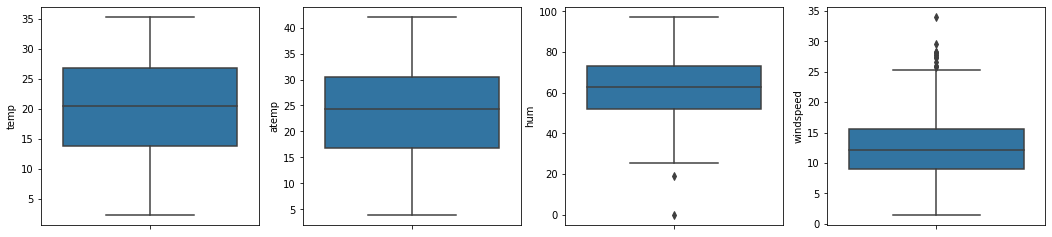

In [15]:
#Let's plot a boxplot
columns=['temp','atemp','hum','windspeed']
plt.figure(figsize=(18,4))

i = 1
for columns in columns:
    plt.subplot(1,4,i)
    sns.boxplot(y=columns, data=Bike_sharing)
    i+=1

As we can see that, there are no outrliers present.

Now let's perform encoding to convert Numerical variables to Categorical for 'weathersit' and 'season'.

In [16]:
#Encoding to convert Numerical variables to Categorical for 'weathersit' and 'season' columns.
Bike_sharing.season = Bike_sharing.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
Bike_sharing.weathersit = Bike_sharing.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [17]:
#check if coversion has been done or not.
Bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
#Now, let's also perform Encoding to convert Numerical variables to Categorical for 'mnth' and 'weekday' columns.
Bike_sharing.mnth = Bike_sharing.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
Bike_sharing.weekday = Bike_sharing.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [19]:
# check if coversion has been done or not.
Bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
# check the column info of the dataset
Bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


## Step 2: Visualising the Data

<Figure size 1080x2160 with 0 Axes>

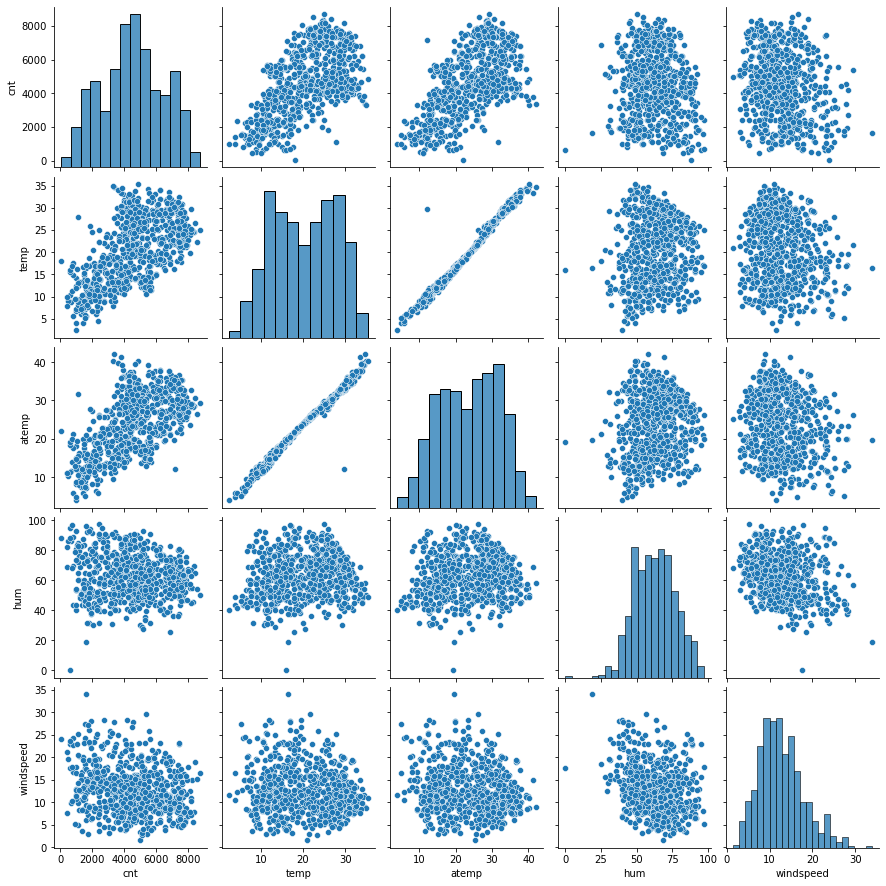

In [21]:
#Let's plot a pairplot for numeric variables.
plt.figure(figsize = (15,30))
sns.pairplot(data=Bike_sharing,vars=['cnt','temp','atemp','hum','windspeed'])
plt.show()

As we can see that, temp and atemp are highly correlated.
Also, both are highly correlated with target variable cnt which means cnt has linear correlationship with temp and atemp.

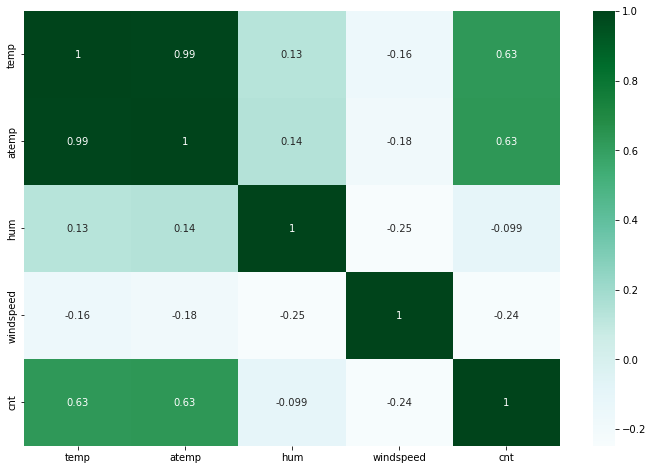

In [22]:
#Now, let's check for continuous variables relationship with each other.
plt.figure(figsize = (12,8))
sns.heatmap(Bike_sharing[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

As we can see that, temp and atemp are highly correlated.
Also, both are highly correlated with target variable cnt which means cnt has linear correlationship with temp and atemp.

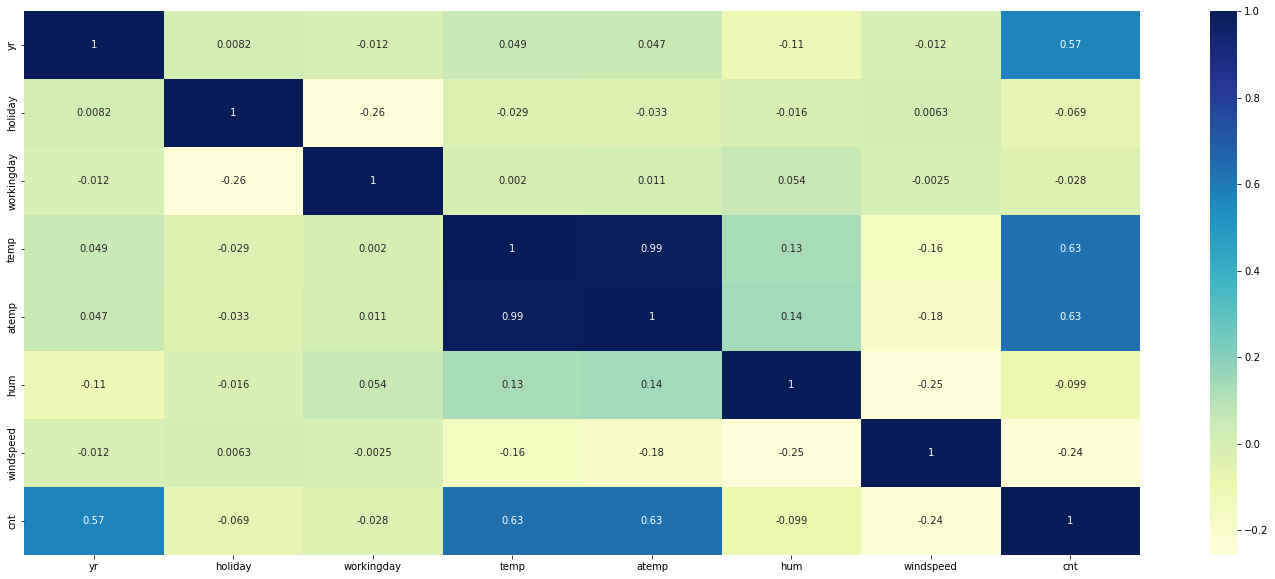

In [23]:
#Now, let's plot Heatmap to see correlation between variables.
corr= Bike_sharing.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr, annot=True, cmap='YlGnBu' )
plt.show()

As we can see that, temp, atemp seems to be highly correlated. and only should variable can be considered for the model.
Also, both these variables have a linear relationship with target variable cnt.
But, both of these variables can't be used in the model due to multicolinearity.
Hence, we will use VIF i.e. the Variance Inflation Factor to choose one.

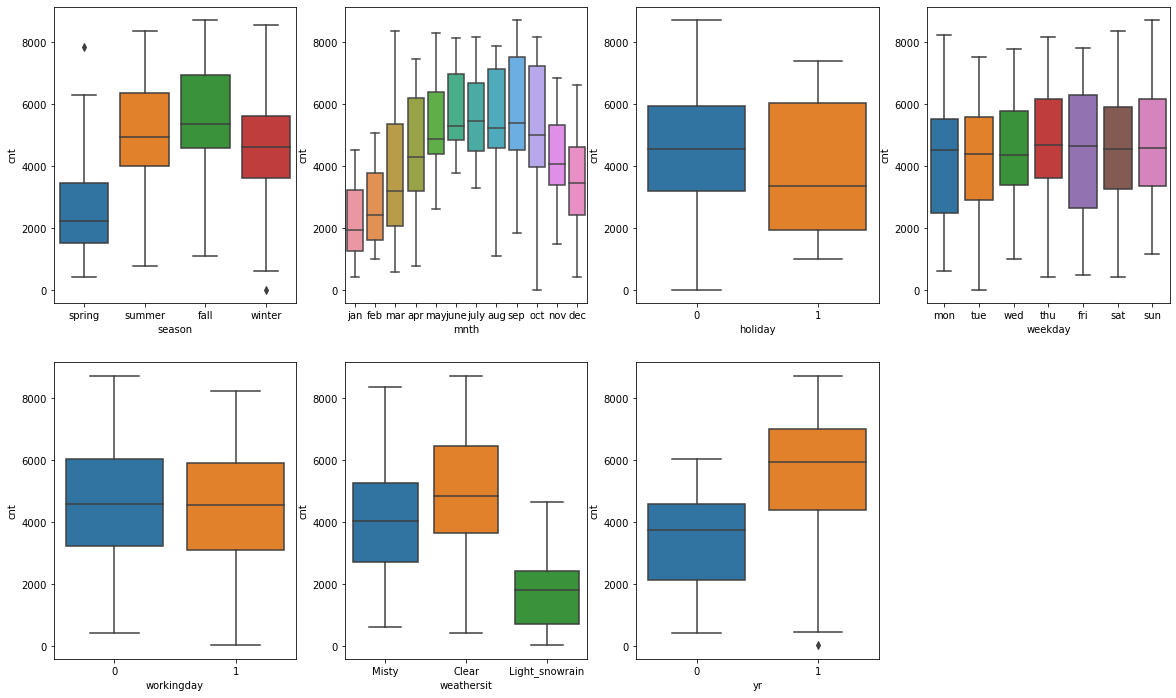

In [24]:
#Now, let's visualize the categorical columns to see how predictor variable stands against the target variable.

plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
sns.boxplot(x='season', y='cnt', data=Bike_sharing)

plt.subplot(2,4,2)
sns.boxplot(x='mnth', y='cnt', data=Bike_sharing)

plt.subplot(2,4,3)
sns.boxplot(x='holiday', y='cnt', data=Bike_sharing)

plt.subplot(2,4,4)
sns.boxplot(x='weekday', y='cnt', data=Bike_sharing)

plt.subplot(2,4,5)
sns.boxplot(x='workingday', y='cnt', data=Bike_sharing)

plt.subplot(2,4,6)
sns.boxplot(x='weathersit', y='cnt', data=Bike_sharing)

plt.subplot(2,4,7)
sns.boxplot(x='yr', y='cnt', data=Bike_sharing)

plt.show()

Below are the observations derived from the above plots:-
1. Season fall has highest demand for rental bikes.
2. There is a consistent growth in demand from Jan to June. However, after September, we can see a fall in demand.
   Also, we can see that, September month is highest in terms of demand. Weather condition can be a major factor here.
3. Demand has fall on holidays.
4. Demand seems to be high on Friday. However, there is no clarity found about demand basis on weekday data.
5. workingday is not giving clear understanding about demand.
6. The clear weathersit has highest demand.
7. Demand for next year seems to be on higher end.

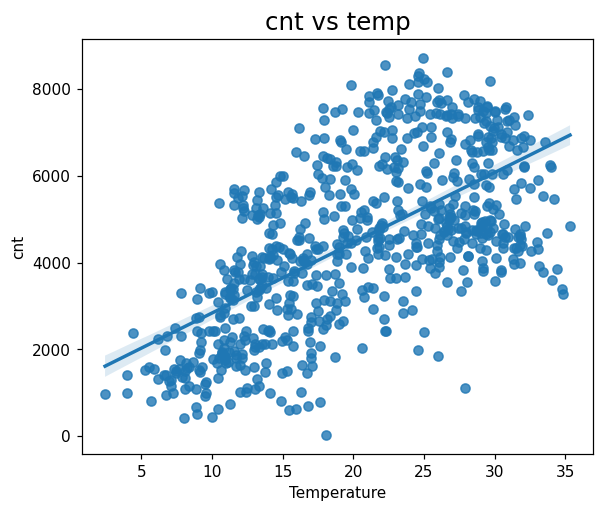

In [25]:
#Now, let's plot cnt vs temp
plt.figure(figsize=(6,5), dpi=110)
plt.title("cnt vs temp", fontsize=16)
sns.regplot(data=Bike_sharing, y="cnt", x="temp")
plt.xlabel("Temperature")
plt.show()

As we can see thet, demand for bikes is positively correlated to temperature and there is a linear correlation between them.

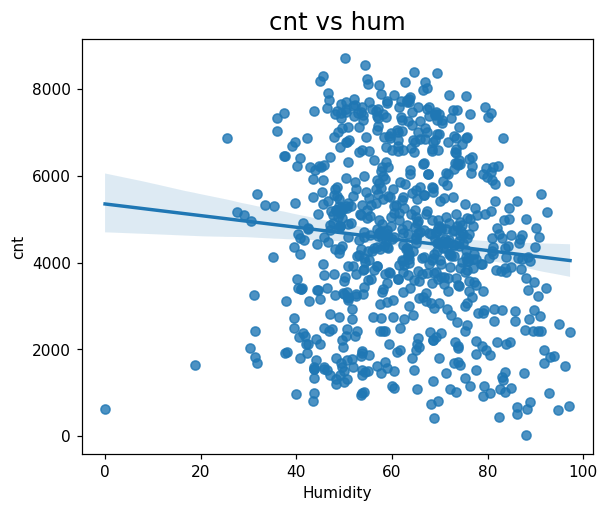

In [26]:
#Now, let's plot cnt vs hum
plt.figure(figsize=(6,5), dpi=110)
plt.title("cnt vs hum", fontsize=16)
sns.regplot(data= Bike_sharing, y="cnt", x="hum")
plt.xlabel("Humidity")
plt.show()

As we can see that, there is no linear correlation between cnt and humidity.

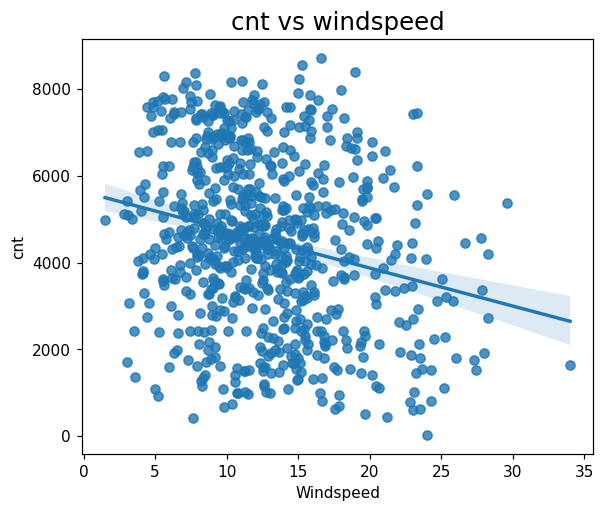

In [27]:
#Now, let's plot cnt vs windspeed
plt.figure(figsize=(6,5), dpi=110)
plt.title("cnt vs windspeed", fontsize=16)
sns.regplot(data= Bike_sharing, y="cnt", x="windspeed")
plt.xlabel("Windspeed")
plt.show()

Here as well, there is no linear correlation between cnt and windspeed.

## Step 3: Data Preparation

In [28]:
#Let's create Dummy variable for season, mnth, weekday and weathersit.

months_bike=pd.get_dummies(Bike_sharing.mnth,drop_first=True)
seasons_bike=pd.get_dummies(Bike_sharing.season, drop_first= True)
weekdays_bike=pd.get_dummies(Bike_sharing.weekday, drop_first= True)
weathersit_bike=pd.get_dummies(Bike_sharing.weathersit, drop_first= True)

In [29]:
#Check head of the dataset
Bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [30]:
#Let's now merge dummy variable dataset with dataframe.
Bike_sharing_new= pd.concat([Bike_sharing, months_bike, weekdays_bike,weathersit_bike,seasons_bike], axis=1)

In [31]:
#Check head of the new dataset
Bike_sharing_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [32]:
Bike_sharing_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [33]:
Bike_sharing_new.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,0.084932,0.084932,...,0.142466,0.142466,0.142466,0.143836,0.142466,0.028767,0.336986,0.246575,0.252055,0.243836
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,0.278971,0.278971,...,0.349767,0.349767,0.349767,0.351164,0.349767,0.167266,0.473004,0.431313,0.434490,0.429689
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
Bike_sharing_new.shape

(730, 34)

In [35]:
#Now, let's drop unnecessary columns for which we have already created dummy variables.
Bike_sharing_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [36]:
#Let's again check the head of new dataframe
Bike_sharing_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
Bike_sharing_new.shape

(730, 30)

In [38]:
Bike_sharing_new.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,0.084932,0.084932,...,0.142466,0.142466,0.142466,0.143836,0.142466,0.028767,0.336986,0.246575,0.252055,0.243836
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,0.278971,0.278971,...,0.349767,0.349767,0.349767,0.351164,0.349767,0.167266,0.473004,0.431313,0.434490,0.429689
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
Bike_sharing_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.
Hence, now let's split the dataframe into Train and Test

In [40]:
#Let's split the data into Train and Test
np.random.seed(0)
bike_train, bike_test = train_test_split(Bike_sharing_new, train_size= 0.7, test_size= 0.3, random_state= 100)

In [41]:
#check shape of the training dataset.
bike_train.shape

(510, 30)

In [42]:
#check shape of the testing dataset.
bike_test.shape

(219, 30)

In [43]:
#First, let's check head of the training dataset before we perform rescaling on features
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,0,1,0,0,0,0,1
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,1,0,0,0,0,1,0,1,0


In [44]:
#Now, let's use MinMaxScaler for Rescaling the features
scaler = MinMaxScaler()

In [45]:
#Let's apply scaler() to all the columns excluding 'yes/no' and 'dummy' variables.
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [46]:
#let's check head of the training dataset after rescaling on features
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,1,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,0,1,0,1,0


In [47]:
#Let's check for statistical information of training dataset.
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


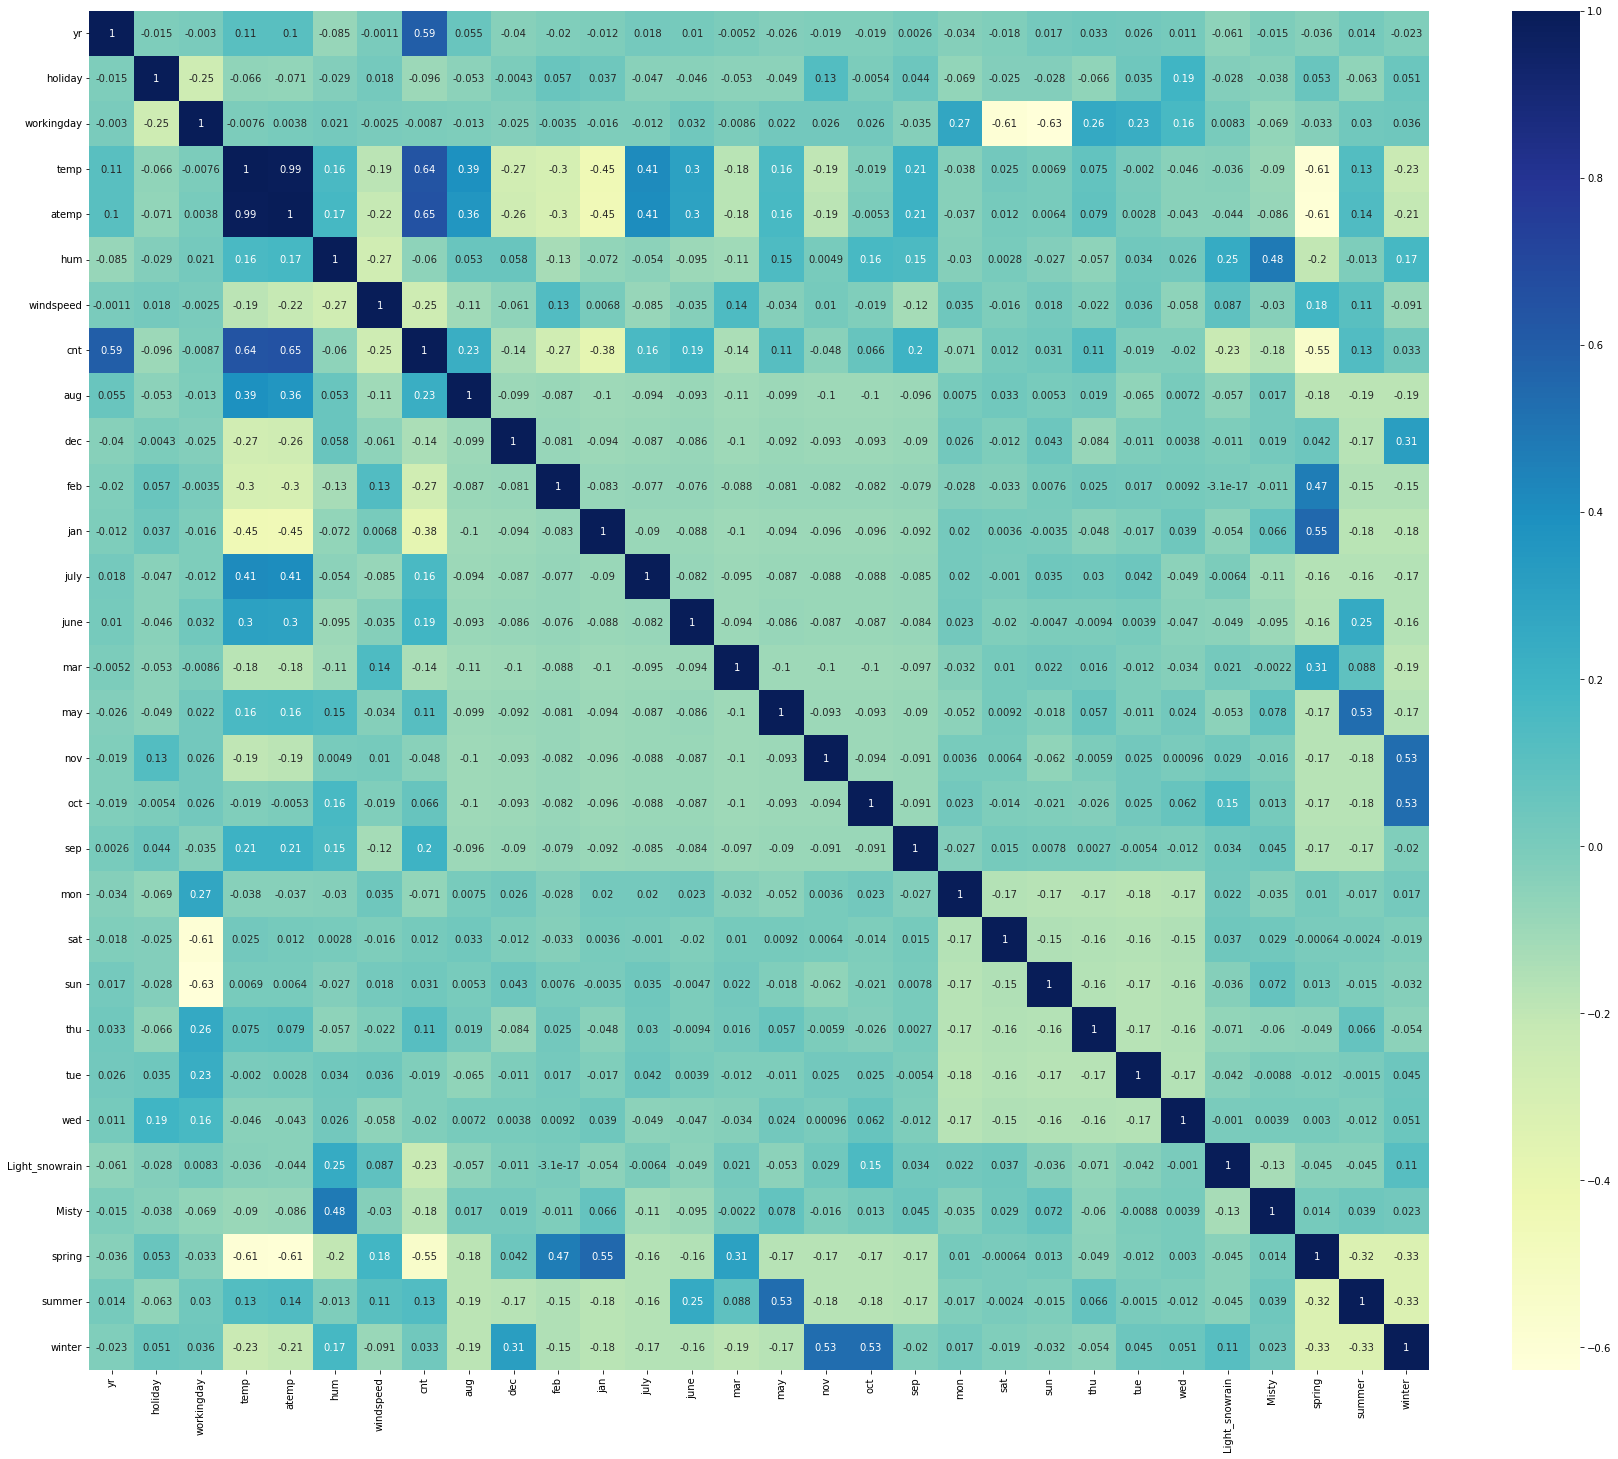

In [48]:
#Let's check for highly correlated variables after data rescaling.
plt.figure(figsize = (30,25))
matrix= np.triu(bike_train.corr())
sns.heatmap(bike_train.corr(), annot= True, cmap="YlGnBu")
plt.show()

As we can see that, temp and atemp are highly correlated.
Also, temp and year variables seems to have a positive correlation with cnt.
Spring season with Jan, Summer season with may month and Winter season with oct & nov month represents positive correlation.

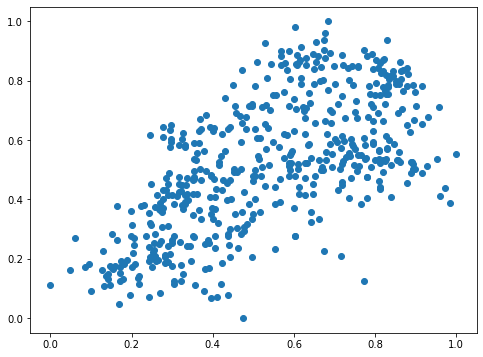

In [49]:
#Let's plot a scatterplot for temp and cnt.
plt.figure(figsize=[8,6])
plt.scatter(bike_train.temp, bike_train.cnt)
plt.show()

As we can see that from above plot also, there is a postive correlation between cnt and temp.

In [50]:
#let's Divide into X and Y sets for the model building
y_train = bike_train.pop('cnt')
X_train = bike_train

In [51]:
# Recursive Feature Elimination i.e. RFE to eliminate some columns.
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [52]:
rfe = RFE (lr, step=15)
rfe = rfe.fit(X_train, y_train)

In [53]:
#Now, let's check the selected variables and store the same in new variable.
cols_RFE = X_train.columns[rfe.support_]
print(cols_RFE)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'jan', 'sep', 'sat', 'sun', 'Light_snowrain', 'Misty', 'winter'],
      dtype='object')


In [54]:
#Also, let's check for rejected columns.
X_train.columns[~rfe.support_]

Index(['aug', 'dec', 'feb', 'july', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'thu', 'tue', 'wed', 'spring', 'summer'],
      dtype='object')

In [55]:
#Let's create a new dataframe to store RFE selected variables.
X_train_rfe = X_train[cols_RFE]

In [56]:
X_train_rfe.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,jan,sep,sat,sun,Light_snowrain,Misty,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,1,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,1,0,1,0


In [57]:
#Now, we need to create a function to calculate VIF.

def calVIF(Bike_sharing):
    vif = pd.DataFrame()
    vif['Features'] = Bike_sharing.columns
    vif['VIF'] = [variance_inflation_factor(Bike_sharing.values, i) for i in range(Bike_sharing.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [58]:
#Now, let's calculate VIF
calVIF(X_train_rfe)

,Features,VIF
4,atemp,356.18
3,temp,345.79
5,hum,35.58
2,workingday,30.63
10,sun,6.39
9,sat,6.08
6,windspeed,5.38
12,Misty,2.36
0,yr,2.07
1,holiday,1.76


As we can see that, atemp has high VIF value.

## Step 5: Build a Linear Regression Model

In [59]:
#Let's Build 1st linear Regression Model.
X_train_lr_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lr_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     161.8
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          1.93e-174
Time:                        23:18:28   Log-Likelihood:                 476.78
No. Observations:                 510   AIC:                            -923.6
Df Residuals:                     495   BIC:                            -860.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3011      0.082      3.

In [60]:
#As we can see that, atemp has highest VIF value. Hence, we need to drop it.
X_train_new = X_train_rfe.drop(['atemp','hum','workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calVIF(X_train_new)

,Features,VIF
2,temp,3.69
3,windspeed,3.17
0,yr,2.04
9,Misty,1.52
10,winter,1.29
7,sun,1.19
4,jan,1.18
6,sat,1.18
5,sep,1.16
8,Light_snowrain,1.08


As you can see that, now VIF values are good as are less that 5. 

In [61]:
#Let's Build 2nd linear Regression Model.
X_train_lr_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lr_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     200.6
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          4.86e-175
Time:                        23:18:28   Log-Likelihood:                 470.04
No. Observations:                 510   AIC:                            -916.1
Df Residuals:                     498   BIC:                            -865.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1789      0.020      8.

In [62]:
#As we can see that, sat has highest p value. Hence, we need to drop it.
X_train_new = X_train_new.drop(['sat'], axis = 1)

# Run the function to calculate VIF for the new model
calVIF(X_train_new)

,Features,VIF
2,temp,3.61
3,windspeed,3.16
0,yr,2.04
8,Misty,1.51
9,winter,1.29
4,jan,1.17
5,sep,1.16
6,sun,1.16
7,Light_snowrain,1.08
1,holiday,1.04


As we can see that, VIF doesnt seems to be affected much after dropping few of the variables.

In [63]:
#Let's Build 3rd linear Regression Model.

X_train_lr_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lr_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     220.3
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          7.08e-176
Time:                        23:18:28   Log-Likelihood:                 469.22
No. Observations:                 510   AIC:                            -916.4
Df Residuals:                     499   BIC:                            -869.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1810      0.020      8.

In [64]:
#As we can see that, sat has highest p value. Hence, we need to drop it.
X_train_new = X_train_new.drop(['sun'], axis = 1)

# Run the function to calculate VIF for the new model
calVIF(X_train_new)

,Features,VIF
2,temp,3.57
3,windspeed,3.15
0,yr,2.03
7,Misty,1.50
8,winter,1.29
4,jan,1.17
5,sep,1.16
6,Light_snowrain,1.08
1,holiday,1.04


In [65]:
#Let's Build 4th linear Regression Model.

X_train_lr_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lr_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     244.1
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          1.18e-176
Time:                        23:18:28   Log-Likelihood:                 468.22
No. Observations:                 510   AIC:                            -916.4
Df Residuals:                     500   BIC:                            -874.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1830      0.020      9.

We can consider the above model i.e Model 4, as since, the p-values for all the predictors seems to be significant as values are less than 0.05.
Also, F-Statistics value of 244.1 i.e greater than 1 and the probability of F-statistics is 1.18e-176 i.e almost equals to zero which states that the overall model is significant.

In [66]:
#Now, let's check the parameters & coefficients.
lr_4.params

const             0.183025
yr                0.234223
holiday          -0.103713
temp              0.512596
windspeed        -0.150950
jan              -0.079696
sep               0.074901
Light_snowrain   -0.286895
Misty            -0.073591
winter            0.088396
dtype: float64

## Step 6: Residual Analysis of the train data

In [67]:
X_train_lr_4

,const,yr,holiday,temp,windspeed,jan,sep,Light_snowrain,Misty,winter
653,1.0,1,0,0.509887,0.300794,0,0,0,0,1
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,1,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,0,1,0
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,0,1,1


In [68]:
y_train_pred = lr_4.predict(X_train_lr_4)

In [69]:
y_train_pred.head()

653    0.721604
576    0.795145
426    0.531881
728    0.442789
482    0.518023
dtype: float64

Text(0.5, 0, 'Errors')

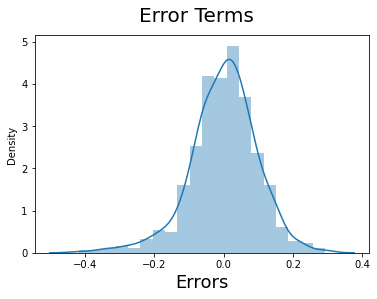

In [70]:
#Now, let's Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)   

As we can see that, Error terms are normally distributed with mean zero.

In [71]:
#Let's check for multi-colinearity.
calVIF(X_train_new)

,Features,VIF
2,temp,3.57
3,windspeed,3.15
0,yr,2.03
7,Misty,1.50
8,winter,1.29
4,jan,1.17
5,sep,1.16
6,Light_snowrain,1.08
1,holiday,1.04


As we can see that, VIF values are less than 5 which is considerble and good.

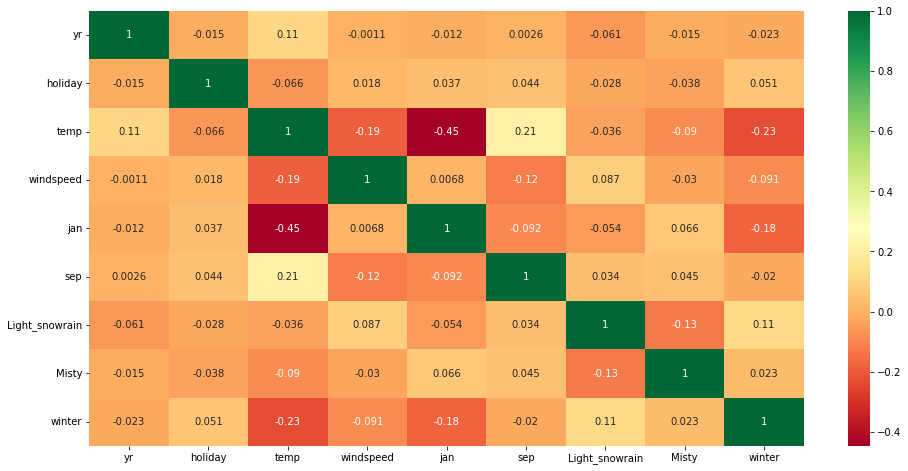

In [72]:
#Now, let's plot heatmap to check multi-colinearity.
plt.figure(figsize=(16,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

As we can see that, there is no multicolinearity found.

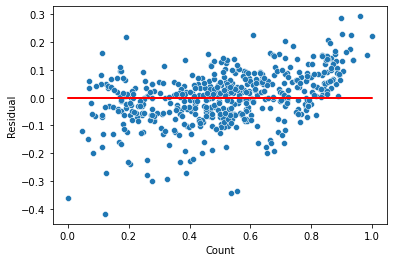

In [73]:
#Now let's check for linearity
y_train_pred = lr_4.predict(X_train_lr_4)
residual= y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

As we can see that, there are no visible pattern observed from above plot for residuals.

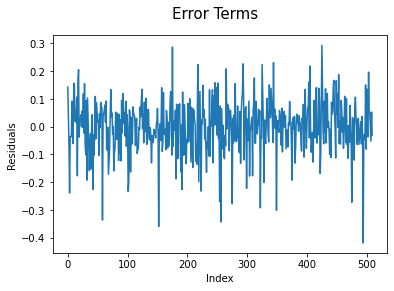

In [74]:
#Now let's check if error terms are independent of each other or not.
c = [i for i in range(0,len(X_train),1)]
plt.plot(c, y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()

As we can see that, error terms are independent of each other.

In [75]:
#Let's check for R-squared value
r2_score(y_train, y_train_pred)

0.8145773919657567

As we can see that, R squared value is same as Model 3.
R^2 value for predictions on test data is 0.815 which is a good R-squared value.

In [88]:
adjusted_r2_train = round(1-(1-r2)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1),4)
print(adjusted_r2_train)

0.7529


## Step 7: Making Predictions Using the Final Model

In [76]:
#Let's apply scaling on Test dataset.
num_vars= ['temp', 'atemp','holiday','windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,0.010305,0,0.831783,0.769660,63.7917,0.084219,0.692706,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0.000000,1,0.901354,0.842587,59.2083,0.153728,0.712034,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0.000000,0,0.511964,0.496145,81.2917,0.334206,0.303382,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0.000000,1,0.881625,0.795343,42.4167,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0.000000,0,0.817246,0.741471,30.5000,0.537414,0.569029,0,0,...,1,0,0,0,0,0,0,0,1,0


In [77]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.000376,0.639269,0.558941,0.532991,61.961883,0.313350,0.520592,0.059361,0.086758,...,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635,0.255708,0.264840,0.232877
std,0.500722,0.001938,0.481313,0.233698,0.217888,14.456669,0.159947,0.218435,0.236840,0.282125,...,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.046591,0.025950,25.416700,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,51.166700,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,60.916700,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,72.192050,0.403048,0.672745,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,0.010305,1.000000,0.984424,0.980934,97.250000,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [79]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lr_4 = sm.add_constant(X_test)

In [80]:
y_pred = lr_4.predict(X_test_lr_4)

In [81]:
#Let's check R squared value
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7669

## Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

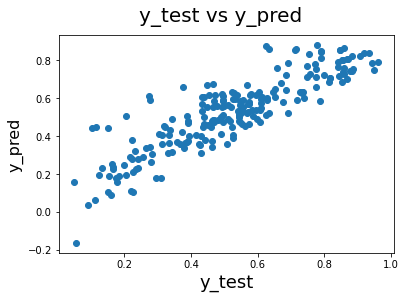

In [82]:
#Now, Let's plot y_test and y_pred
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y test', fontsize = 18)
plt.ylabel('y pred', fontsize = 16) 

As We can see that, the variance of the residuals i.e.error terms is constant across predictions. i.e. there is no variance in error terms.

In [83]:
lr_4.params

const             0.183025
yr                0.234223
holiday          -0.103713
temp              0.512596
windspeed        -0.150950
jan              -0.079696
sep               0.074901
Light_snowrain   -0.286895
Misty            -0.073591
winter            0.088396
dtype: float64

In [85]:
#Let's Calculate Adjusted-R^2 value for the test dataset
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7569


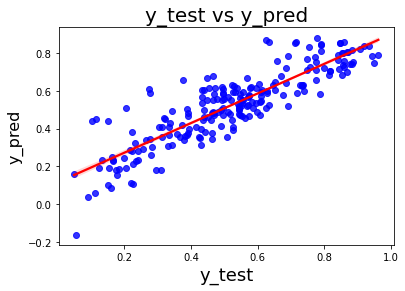

In [86]:
#Let's Visualize the fit on the test data
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

## Comparision between Training and Testing dataset

- Train dataset R^2          : 0.815
- Test dataset R^2           : 0.767
- Train dataset Adjusted R^2 : 0.752
- Test dataset Adjusted R^2  : 0.757

### Interepretation:-
    
The comapany should focus on the following features:
1. Company should focus on expanding business during Spring.
2. Company should focus on expanding business during September.
3. Based on previous data, increase in number of users is expected once situation is normal as compared to 2019.

### Conclusion:-
Below are the Significant variables to predict the demand for shared bikes.
holiday, humidity, months, Season, Sunday, temperature, weathersit, windspeed, Year.